# Load libraries 

In [10]:
import os
print(os.environ["CUDA_DEVICE_ORDER"])
print(os.environ["CUDA_VISIBLE_DEVICES"])
#os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

KeyError: 'CUDA_DEVICE_ORDER'

In [11]:
#load libraries 
import sys,pandas as pd, matplotlib , matplotlib.pyplot as plt, matplotlib.lines , numpy as np,cupy as cp, math, pylab
#import cudf
#import ROOT
#from ROOT import TFile

#import root_pandas
import uproot3
%matplotlib inline

#presets for plot style
from scipy.constants import golden
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (7, 7/golden),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from scipy.optimize import curve_fit

import misc_util


# Load tuple files
The following will automatically download the files from https://userweb.jlab.org/~spaul/sidis_tuple_examples, if they are not already downloaded.  

In [12]:

data_dihadrons = uproot3.open('../in/data_dihadrons.root')['dihadrons'].pandas.df()
data_dipions = uproot3.open('../in/data_dipions.root')['dipions'].pandas.df()

Now load the tuples from the files.

In [13]:
for df in data_dihadrons, data_dipions:
    df['diff_phi_shift'] = df.diff_phi_cm + (2*np.pi)*(df.diff_phi_cm<-np.pi/2)

In [14]:
#print the number of entries in each tuple
print("data dihadrons \tlength =", len(data_dihadrons))
print("data dipions \tlength =", len(data_dipions))

data dihadrons 	length = 896732
data dipions 	length = 945047


In [15]:
print(data_dihadrons.columns)
if not 'mx_eh1h2x' in data_dihadrons.columns:
    expr = "sqrt((E+.93827208816-sqrt(e_p**2+.000511**2)-sqrt(h1_p**2+((abs(h1_pid)==211)*.13957018+(abs(h1_pid)==321)*.493677+(abs(h1_pid)==2212)*.93827208816)**2)"+\
   "-sqrt(h2_p**2+((abs(h2_pid)==211)*.13957018+(abs(h2_pid)==321)*.493677+(abs(h2_pid)==2212)*.93827208816)**2))**2"+\
       "-(E-e_p*cos(e_th)-h1_p*cos(h1_th)-h2_p*cos(h2_th))**2"+\
       "-(-e_p*sin(e_th)*cos(e_ph)-h1_p*sin(h1_th)*cos(h1_ph)-h2_p*sin(h2_th)*cos(h2_ph))**2"+\
       "-(-e_p*sin(e_th)*sin(e_ph)-h1_p*sin(h1_th)*sin(h1_ph)-h2_p*sin(h2_th)*sin(h2_ph))**2)"
    data_dihadrons['mx_eh1h2x'] = data_dihadrons.eval(expr)

if not 'pair_mass' in data_dihadrons.columns:
    expr = "sqrt((sqrt(h1_p**2+((abs(h1_pid)==211)*.13957018+(abs(h1_pid)==321)*.493677+(abs(h1_pid)==2212)*.93827208816)**2)"+\
       "+sqrt(h2_p**2+((abs(h2_pid)==211)*.13957018+(abs(h2_pid)==321)*.493677+(abs(h2_pid)==2212)*.93827208816)**2))**2"+\
           "-(h1_p*cos(h1_th)+h2_p*cos(h2_th))**2"+\
           "-(h1_p*sin(h1_th)*cos(h1_ph)+h2_p*sin(h2_th)*cos(h2_ph))**2"+\
           "-(h1_p*sin(h1_th)*sin(h1_ph)+h2_p*sin(h2_th)*sin(h2_ph))**2)"
    data_dihadrons['pair_mass'] = data_dihadrons.eval(expr)

if not 'mx_eh2x' in data_dihadrons.columns:
    expr = "sqrt((E+.93827208816-sqrt(e_p**2+.000511**2)"+\
       "-sqrt(h2_p**2+((abs(h2_pid)==211)*.13957018+(abs(h2_pid)==321)*.493677+(abs(h2_pid)==2212)*.93827208816)**2))**2"+\
           "-(E-e_p*cos(e_th)-h2_p*cos(h2_th))**2"+\
           "-(-e_p*sin(e_th)*cos(e_ph)-h2_p*sin(h2_th)*cos(h2_ph))**2"+\
           "-(-e_p*sin(e_th)*sin(e_ph)-h2_p*sin(h2_th)*sin(h2_ph))**2)"
    data_dihadrons['mx_eh2x'] = data_dihadrons.eval(expr)

if not 'mx_eh1x' in data_dihadrons.columns:
    expr = "sqrt((E+.93827208816-sqrt(e_p**2+.000511**2)"+\
       "-sqrt(h1_p**2+((abs(h1_pid)==211)*.13957018+(abs(h1_pid)==321)*.493677+(abs(h1_pid)==2212)*.93827208816)**2))**2"+\
           "-(E-e_p*cos(e_th)-h1_p*cos(h1_th))**2"+\
           "-(-e_p*sin(e_th)*cos(e_ph)-h1_p*sin(h1_th)*cos(h1_ph))**2"+\
           "-(-e_p*sin(e_th)*sin(e_ph)-h1_p*sin(h1_th)*sin(h1_ph))**2)"
    data_dihadrons['mx_eh1x'] = data_dihadrons.eval(expr)
#data_dipions['missing_mass'] = data_dipions.eval(expr.replace("h1",'pi1').replace('h2','pi2'))


Index(['E', 'helicity', 'e_p', 'e_th', 'e_ph', 'nu', 'Q2', 'x', 'y', 'W',
       'ntracks', 'h1_chi2pid', 'h2_chi2pid', 'h1_pid', 'h2_pid', 'h1_p',
       'h2_p', 'h1_th', 'h2_th', 'h1_ph', 'h2_ph', 'h1_z', 'h2_z', 'h1_eta',
       'h2_eta', 'h1_cm_p', 'h2_cm_p', 'h1_cm_th', 'h2_cm_th', 'h1_cm_ph',
       'h2_cm_ph', 'h1_cm_eta', 'h2_cm_eta', 'h1_cm_pt', 'h2_cm_pt',
       'pair_mass', 'mx_eh1h2x', 'mx_eh1x', 'mx_eh2x', 'diff_eta', 'diff_phi',
       'nelectrons', 'diff_phi_cm', 'diff_eta_cm', 'diff_phi_shift'],
      dtype='object')


In [16]:
import scipy.optimize
def yridge(df,n=3,bins = 50,debugplots = False):
    x,y,dy=[],[],[]
    denom = len(df)*2*np.pi/bins
    for xmid, bindf in misc_util.BinIterator(df, "abs(diff_phi)", 0,np.pi,bins):
        x.append(xmid)
        y.append(len(bindf)/denom)
        dyi = np.sqrt(len(bindf))/denom
        dyi=dyi
        if xmid<0.1 or xmid>2:
            dyi = 1000;
        dy.append(dyi)
    x = pd.Series(x)
    y = pd.Series(y)
    dy = pd.Series(dy)
    def f (xx,b0,b1,b2,b3):
        args=[b0,b1,b2,b3]
        tot = 0
        for i in range(len(args)):
            tot+=args[i]*np.cos(i*xx)
        return tot
    b,bcov = scipy.optimize.curve_fit(f, x, y,sigma=dy)
    #b = [2*sum(y*np.cos(i*x)/dy**2)/sum(1/dy**2) for i in range(0,n+1)]
    #b = [2*sum(y*np.cos(i*x))/len(x) for i in range(0,n+1)]
    #b[0]/=2
   
    s = 0
    for i in range(0,n+1):
        s = b[i]*np.cos(i*x)+s
    if(debugplots):
        print(b)
        plt.errorbar(x,y,dy,linestyle='',marker='o',color='k')
        plt.plot(x,s,linestyle='-')
        plt.gca().set_ylim(-1,1)
    
    smin = s[0]
    xmin=0
    for xi,si in zip(x,s):
        if(si<smin):
            xmin = xi
            smin = si
    integral = 0
    dx = x[1]-x[0]
    for xi,si in zip(x,s):
        if(xi<xmin):
            integral+=(si-smin)*dx
        else:
            break
    return integral
    

In [17]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h1_cm_pt<3 and h2_pid == 2212 and mx_eh1x>1.665")

print(yridge(df, ))



0


In [66]:
import scipy.optimize,numpy.random,time,os
def upper_limit_yridge(df,n=3,bins = 100,miniterations=100,maxiterations=200000,fitrange=(0,np.pi),
                       progressPrintInterval=None, #print stats after every [...] iterations (don't print if 0)
                       sayDone=False):
    if len(df) == 0:
        return 1, 1.0, 0,0
    start = time.perf_counter()
    x,y,dy,w=[],[],[],[]
    denom = len(df)*2*np.pi/bins
    for xmid, bindf in misc_util.BinIterator(df, "abs(diff_phi)", 0,np.pi,bins):
        x.append(xmid)
        y.append(len(bindf)/denom)
        dyi = max(np.sqrt(len(bindf)),1)/denom
        dy.append(dyi)
        w.append(1/dyi**2 if not(xmid<fitrange[0] or xmid>fitrange[1]) else 1000);
    x = pd.Series(x)
    y = pd.Series(y)
    dy = pd.Series(dy)
    w = pd.Series(w)
    yields=[]
    nonzeroyields=0
    for ii in range(maxiterations):
        yrand = y+numpy.random.randn(len(dy))*dy*(dy<999)
        #print((yrand-y)/dy)
        if n==3:
            def f (xx,b0,b1,b2,b3):
                args=[b0,b1,b2,b3]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        
        if n==4:
            def f (xx,b0,b1,b2,b3,b4):
                args=[b0,b1,b2,b3,b4]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        if n==5:
            def f (xx,b0,b1,b2,b3,b4,b5):
                args=[b0,b1,b2,b3,b4,b5]
                tot = 0
                for i in range(len(args)):
                    tot+=args[i]*np.cos(i*xx)
                return tot
        b,bcov = scipy.optimize.curve_fit(f, x, yrand,sigma=1/np.sqrt(w))
        
        #don't waste your time if f''[0] is positive
        fpp0= sum([-i*i*b[i] for i in range(len(b))])
        #print(fpp0)
        if fpp0 < 0:  
            s = 0
            for i in range(0,n+1):
                s = b[i]*np.cos(i*x)+s

            smin = max(s)

            xmin=fitrange[0]
            for xi,si in zip(x,s):
                if(xi<fitrange[0]):
                    continue
                if(si<smin):
                    xmin = xi
                    smin = si
            integral = 0
            dx = x[1]-x[0]
            for xi,si in zip(x,s):
                if(xi<xmin):
                    integral+=(si-smin)*dx
                else:
                    break
            yields.append(integral)
            nonzeroyields+=1
        else :
            yields.append(0)
        durationsofar = time.perf_counter()-start;
        if progressPrintInterval:
            if ii%progressPrintInterval == 0:
                print("iter ", ii, "; average so far: ", durationsofar/(ii+1), 
                    ";   time so far: ",durationsofar//3600,"hours", (durationsofar//60)%60, "minutes", int(durationsofar % 60), "seconds")
        if ii == miniterations and nonzeroyields == 0:
            break
            
    duration = time.perf_counter()-start;
    print("total time: ",int(duration//3600),"hours", int((duration//60)%60), "minutes", int(duration % 60), "seconds")
    if sayDone:
        os.system('say "done"')    
    yields = pd.Series(yields)
    
    UL = yields.quantile(.95)
    CL = .95
    median = yields.median()
    LL = yields.quantile(.05)
    
    thresh = 1e-5
    if UL <thresh:
        UL = thresh
        CL = len(yields[yields<thresh])/len(yields)
        median = 0
        LL = 0
    return UL, CL,median,LL
    
    

In [67]:

df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h1_cm_pt<3 and h2_pid == 2212 and mx_eh1x>1.665")
print(upper_limit_yridge(df,miniterations=100,n=3,bins=50,fitrange=(0,np.pi),progressPrintInterval=100))


iter  0 ; average so far:  0.10567976598395035 ;   time so far:  0.0 hours 0.0 minutes 0 seconds
iter  100 ; average so far:  0.017488525356258274 ;   time so far:  0.0 hours 0.0 minutes 1 seconds
total time:  0 hours 0 minutes 1 seconds
(1e-05, 1.0, 0, 0)


total time:  0 hours 0 minutes 1 seconds
1e-05 1.0 0 0
total time:  0 hours 0 minutes 1 seconds
1e-05 1.0 0 0
total time:  0 hours 0 minutes 1 seconds
0.024692694155682537 0.95 0.009350616040469101 0.0
total time:  0 hours 0 minutes 1 seconds
0.005857462256303138 0.95 0.0 0.0
total time:  0 hours 0 minutes 1 seconds
1.233141923390137 0.95 0.0 0.0
1 1.0 0 0
total time:  0 hours 0 minutes 1 seconds
1e-05 1.0 0 0
total time:  0 hours 0 minutes 1 seconds
1e-05 1.0 0 0
total time:  0 hours 0 minutes 1 seconds
1e-05 0.97 0 0
total time:  0 hours 0 minutes 1 seconds
0.12575517434707656 0.95 0.0 0.0
total time:  0 hours 0 minutes 1 seconds
5.015882416935845 0.95 0.0 0.0
total time:  0 hours 0 minutes 1 seconds
4.97797297101322 0.95 5.128293628315865e-05 0.0


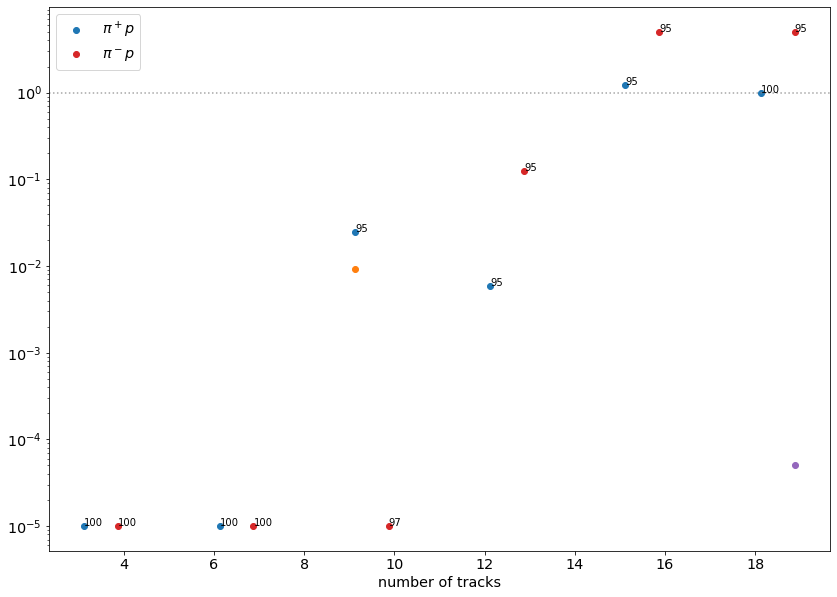

In [71]:
plt.subplots(1,1, figsize=(14,10))
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x>1.665")

mintracks,maxtracks,bins = 2, 20, 6
offset = (maxtracks-mintracks)/bins*0.25
for pid,pm,shift in (211,"+",-offset/2),(-211,'-',offset/2):
    x,ul,cl,medians,ll=[],[],[],[],[]
    df_pid = df.query("h1_pid == %s" %pid)
    for xmid,bindf in misc_util.BinIterator(df_pid,"ntracks", mintracks, maxtracks,bins):
        UL,CL,median,LL = upper_limit_yridge(bindf,miniterations=100,maxiterations=100,n=3,bins=50,fitrange=(0,np.pi))
        print(UL,CL,median,LL)
        x.append(xmid+shift)
        ul.append(UL)
        cl.append(CL)
        medians.append(median)
        ll.append(LL)
    plt.plot(x,ul,marker='o',label='$\\pi^%sp$'%pm,linestyle='')
    plt.plot(x,medians,marker='o',linestyle='')
    plt.plot(x,ll,marker='o',linestyle='')
    plt.gca().set_yscale('log')
    for i in range(len(x)):
        plt.text(x[i],ul[i],'%s'%int(100*cl[i]))
plt.gca().set_xlabel("number of tracks")
plt.gca().legend()
plt.axhline(1,linestyle=':',color='0.5',alpha=0.7)
plt.show()

In [ ]:
df = data_dihadrons.query("h1_cm_eta-h2_cm_eta>2.0 and h1_cm_eta-h2_cm_eta<200.0 and h1_cm_pt>0.3 and h2_cm_pt>0.3"\
        + " and h2_pid == 2212 and mx_eh1x>1.665")

for pid,pm,shift in (211,"+",0),(-211,'-',0.025):
    x,y,cl=[],[],[]
    df_pid = df.query("h1_pid == %s" %pid)
    for xmid,bindf in misc_util.BinIterator(df_pid,"h2_cm_pt", 0.3, 0.9,6):
        UL,CL = upper_limit_yridge(df,miniterations=200000,n=3,bins=50,fitrange=(0,np.pi))
        print(UL,CL)
        x.append(xmid+shift)
        y.append(UL)
        cl.append(CL)
    plt.plot(x,y,marker='o',label='$\\pi^%sp$'%pm,linestyle='')
    plt.gca().set_yscale('log')
    for i in range(len(x)):
        plt.text(x[i],y[i],'%s'%int(100*cl[i]))
plt.gca().set_xlabel("$p_t(p)$")
plt.gca().legend()
plt.show()